# Star Wars - the next generation?

While waiting for Star Wars: The Force Awakens to come out, the team at FiveThirtyEight became interested in answering some questions about Star Wars fans. In particular, they wondered: **does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?**

In [65]:
import pandas as pd
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

Initial column mapping

| name | meaning |
| ---- | ------- |
| RespondentID | An anonymized ID for the respondent (person taking the survey)|
| Gender | The respondent's gender|
| Age | The respondent's age|
| Household Income | The respondent's income|
| Education | The respondent's education level|
| Location (Census Region) | The respondent's location|
| Have you seen any of the 6 films in the Star Wars franchise? | Has a `Yes` or `No` response|
| Do you consider yourself to be a fan of the Star Wars film franchise? | Has a `Yes` or `No` response|

## Clean the data

Remove invalid `RespondentID` rows

In [66]:
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Epi

In [67]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [68]:
star_wars = star_wars[pd.notnull(star_wars['RespondentID'])]

## Map booleans

In [69]:
seen = star_wars['Have you seen any of the 6 films in the Star Wars franchise?']
fan = star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?']

bool_map = {'Yes': True, 'No': False}

seen = seen.map(bool_map)
fan = fan.map(bool_map)

star_wars['Have you seen any of the 6 films in the Star Wars franchise?'] = seen
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] = fan

print(star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts())
print(star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts())

True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64
True     552
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64


## Cleanup and rename checkbox and ranking columns

In [86]:
import numpy as np
"""
"Which of the following Star Wars films have you seen? Please select all that apply.": "Star Wars: Episode I The Phantom Menace.",
"Unnamed: 4": "Star Wars: Episode II Attack of the Clones",
"Unnamed: 5": "Star Wars: Episode III Revenge of the Sith",
"Unnamed: 6": "Star Wars: Episode IV A New Hope",
"Unnamed: 7": "Star Wars: Episode V The Empire Strikes Back",
"Unnamed: 8": "Star Wars: Episode VI Return of the Jedi",
"""
# print(list(zip(range(1,7), star_wars.columns[3:9])))
# rename = {col: "seen_" + str(i) for i, col in enumerate(star_wars.columns[3:9])}
# print(rename)
for col in star_wars.columns[3:9]:
    star_wars[col] = star_wars[col].map({star_wars[col].value_counts().index[0]: True,
                       np.NaN: False})

   


Star Wars: Episode I  The Phantom Menace
Star Wars: Episode II  Attack of the Clones
Star Wars: Episode III  Revenge of the Sith
Star Wars: Episode IV  A New Hope
Star Wars: Episode V The Empire Strikes Back
Star Wars: Episode VI Return of the Jedi


In [92]:
rename = {
"Which of the following Star Wars films have you seen? Please select all that apply.": "seen_1",
"Unnamed: 4": "seen_2",
"Unnamed: 5": "seen_3",
"Unnamed: 6": "seen_4",
"Unnamed: 7": "seen_5",
"Unnamed: 8": "seen_6",}

star_wars = star_wars.rename(columns=rename)

In [93]:
star_wars.iloc[:, 3:9].head()

,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6
1,True,True,True,True,True,True
2,False,False,False,False,False,False
3,True,True,True,False,False,False
4,True,True,True,True,True,True
5,True,True,True,True,True,True


In [94]:
"""
"Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.": "Star Wars: Episode I The Phantom Menace",
"Unnamed: 10": "Star Wars: Episode II Attack of the Clones",
"Unnamed: 11": "Star Wars: Episode III Revenge of the Sith",
"Unnamed: 12": "Star Wars: Episode IV A New Hope",
"Unnamed: 13": "Star Wars: Episode V The Empire Strikes Back",
"Unnamed: 14": "Star Wars: Episode VI Return of the Jedi",
"""

star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

rename = {
"Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.": "ranking_1",
"Unnamed: 10": "ranking_2",
"Unnamed: 11": "ranking_3",
"Unnamed: 12": "ranking_4",
"Unnamed: 13": "ranking_5",
"Unnamed: 14": "ranking_6",
}
star_wars = star_wars.rename(columns=rename)
star_wars[star_wars.columns[9:15]].head()

,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6
1,3.0,2.0,1.0,4.0,5.0,6.0
2,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,2.0,3.0,4.0,5.0,6.0
4,5.0,6.0,1.0,2.0,4.0,3.0
5,5.0,4.0,6.0,2.0,1.0,3.0


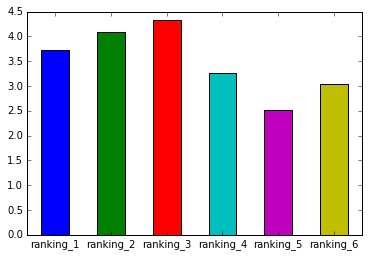

In [100]:
%matplotlib inline

star_wars[star_wars.columns[9:15]].mean().plot.bar(rot=0)


*A lower ranking is better!*

Empire is the highest ranked movie of the 6, and the originals are each more highly ranked than any of the prequals.

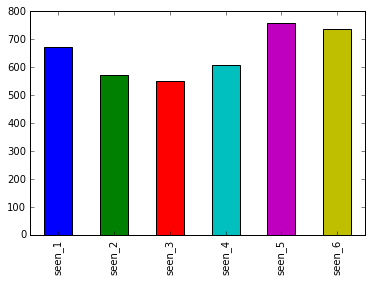

In [103]:
star_wars[star_wars.columns[3:9]].sum().plot.bar()

More people have seen Empire than A New Hope, which is weird. But, the rankings seem to correlate with the viewership of each movie.

## What movies do Star Trek fans like the most?

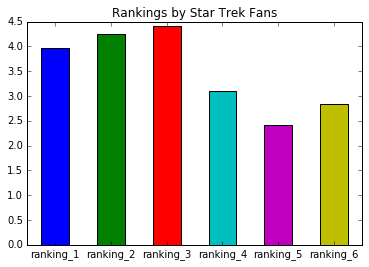

In [110]:
st_fans = star_wars[star_wars["Do you consider yourself to be a fan of the Star Trek franchise?"] == "Yes"]
st_nofan = star_wars[star_wars["Do you consider yourself to be a fan of the Star Trek franchise?"] == "Yes"]

st_fans[st_fans.columns[9:15]].mean().plot.bar(rot=0, title="Rankings by Star Trek Fans")

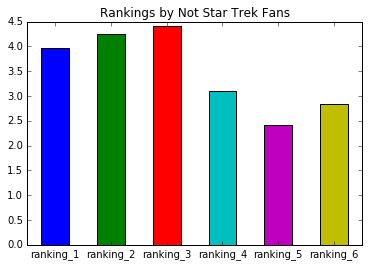

In [111]:
st_nofan[st_nofan.columns[9:15]].mean().plot.bar(rot=0, title="Rankings by Not Star Trek Fans")

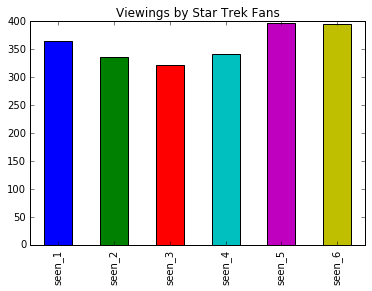

In [112]:
st_fans[st_fans.columns[3:9]].sum().plot.bar(title="Viewings by Star Trek Fans")

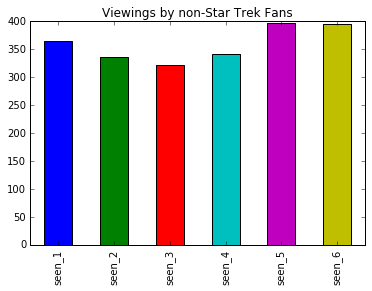

In [113]:
st_nofan[st_nofan.columns[3:9]].sum().plot.bar(title="Viewings by non-Star Trek Fans")

Star Trek fandom does not seem to play a role in rankings or viewership of the Sta